<a href="https://colab.research.google.com/github/srirakshareddy/Semantic-analysis/blob/main/semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import textblob
import nltk
import time

import enchant #spelling
import itertools

#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re 
from textblob import TextBlob, Word, Blobber
#from spellchecker import SpellChecker
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer 

nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn import linear_model,svm
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from collections import Counter


nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfTransformer 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv("data.csv")
a=[0,5];
data=data.iloc[:,a]


In [ ]:
data

,target,text
0,1,Headache and yardwork = miserable hell
1,1,I woke up late and I feel like poo...*sigh* it...
2,1,"Just watched a man date come to an end, it was..."
3,0,Had fun at the carnival with the bff middle s...
4,1,wishes he would love me back!!
...,...,...
113128,0,@kevinkevink Get on &quot;Raging Spirits&quot;...
113129,1,@cafflo You know what to do when you feel slee...
113130,1,@mandyconforth they moved me away from the dog...
113131,1,@carthalis yeah I've only seen (not read) Em...


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    59053
0    54080
Name: target, dtype: int64

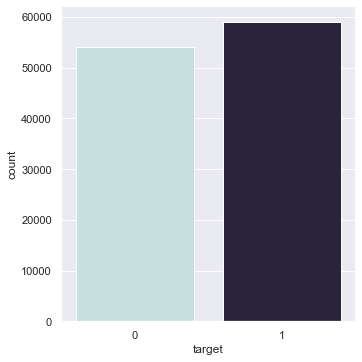

In [ ]:
sns.set(font_scale=1)
sns.catplot("target", data=data, kind="count", palette="ch:start=.2,rot=-.3", height=5)
data['target'].value_counts()

# Cleaning data

In [ ]:
data['tidy'] = data['text'].str.replace("[^A-Za-z']+", " ")

<ipython-input-5-6513f6c03230>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tidy'] = data['text'].str.replace("[^A-Za-z']+", " ")


In [ ]:
d = enchant.Dict("en_US")
def arrangeSentence(sentence):
    sentence=sentence.lower()
    sentence=sentence.split()
    for i in range(len(sentence)):
        if d.check(''.join(''.join(s)[:2] for _, s in itertools.groupby(sentence[i]))):
            sentence[i]=''.join(''.join(s)[:2] for _, s in itertools.groupby(sentence[i]))
        else:
            sentence[i]=''.join(''.join(s)[:1] for _, s in itertools.groupby(sentence[i]))
    sentence=' '.join(sentence)
    return sentence

In [ ]:
stopwordlist = set(stopwords.words("english"))
#the stopwords are collected from the internet
to_remove = ['doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
             'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't","you",
            "your", "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
             'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", 
             "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", 
             "amongst", "amoungst", "amount", "an", 
             "and", "announce", "another", "any", "anybody", "anyhow", 
             "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", 
             "ap", "apart", "apparently", "appreciate", "approximately", "ar", 
             "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", 
             "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", 
             "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", 
             "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", 
             "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
             "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", 
             "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", 
             "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", 
             "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", 
             "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", 
             "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", 
             "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", 
             "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", 
             "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", 
             "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", 
             "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", 
             "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", 
             "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", 
             "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", 
             "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", 
             "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", 
             "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", 
             "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", 
             "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", 
             "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", 
             "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", 
             "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", 
             "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", 
             "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", 
             "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", 
             "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", 
             "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", 
             "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", 
             "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", 
             "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", 
             "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", 
             "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", 
             "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", 
             "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", 
             "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", 
             "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y",
             "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]
stopwordlist = set(stopwords.words('english')).difference(to_remove)

In [ ]:
lemmatizer = WordNetLemmatizer()
for i in range(8799):
    current=data.iloc[i,2]
    current=str(TextBlob(current)).lower().replace("  "," ")
    #type(current)
    current = arrangeSentence(current)
    current = ' '.join([lemmatizer.lemmatize(w) for w in current.split()])
    print(current)
    sentence1=[word for word in current.split() if word not in stopwordlist]
    sentence2=[word for word in sentence1 if len(word)>2]
    current = " ".join(sentence2)
    data.loc[i,'tidy']=str(current)

headache and yardwork miserable hell
i woke up late and i feel like poo sigh it's off to work i go
just watched a man date come to an end it wa cute btw angelreds just lost his phone
had fun at the carnival with the bf middle school jid are slut these day gonna visit my husband i miss him lt
wish he would love me back
what tha lol why yesire it wa very enjoyable and the perfect intro had i known so would have invited you
is off to bed andaming gagawin bukas nightie all htp plurk com p pwqf
rodafowa filling up so be quick if you can i'm superdupergil if i'm not in your friend list
ah day again
godamnit filming graduation with a hangover
tmth my exam dont start until th may so cant be bothered to do too much at the moment good luck you'll do great
stretztalk jaysonjphilips i wasn't there in but i'l take ur word y'all need get in that strolling competition cause it wa
washing machine broke
nick carter aw have fun
eckafatcat hello sexy give me a right a soon a you can love you xx
yes most 

# Counting number of tokens

In [ ]:
#tokenize the tweet data
tt = TweetTokenizer()
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
ps = PorterStemmer()

In [ ]:
# return word_tokenize(text)
def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

def stemming(words):
    stem_words = []
    for w in words:
        w = ps.stem(w)
        stem_words.append(w)
    
    return stem_words


In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
data['stemmed']=data['tidy'].apply(tt.tokenize)
data['stemmed'] = data['stemmed'].apply(stemming)

In [ ]:
data

,target,text,tidy,stemmed
0,1,Headache and yardwork = miserable hell,headache and yardwork miserable hell,"[headach, and, yardwork, miser, hell]"
1,1,I woke up late and I feel like poo...*sigh* it...,woke late and feel like poo sigh it's off work,"[woke, late, and, feel, like, poo, sigh, it', ..."
2,1,"Just watched a man date come to an end, it was...",just watched man date come end cute btw angelr...,"[just, watch, man, date, come, end, cute, btw,..."
3,0,Had fun at the carnival with the bff middle s...,had fun the carnival with the middle school ji...,"[had, fun, the, carniv, with, the, middl, scho..."
4,1,wishes he would love me back!!,wish would love back,"[wish, would, love, back]"
...,...,...,...,...
113128,0,@kevinkevink Get on &quot;Raging Spirits&quot;...,kevinkevink Get on quot Raging Spirits quot a...,"[kevinkevink, get, on, quot, rage, spirit, quo..."
113129,1,@cafflo You know what to do when you feel slee...,cafflo You know what to do when you feel slee...,"[cafflo, you, know, what, to, do, when, you, f..."
113130,1,@mandyconforth they moved me away from the dog...,mandyconforth they moved me away from the dog...,"[mandyconforth, they, move, me, away, from, th..."
113131,1,@carthalis yeah I've only seen (not read) Em...,carthalis yeah I've only seen not read Empire...,"[carthali, yeah, i'v, onli, seen, not, read, e..."


In [ ]:
words = Counter()
for idx in data.index:
    words.update(data.loc[idx, "stemmed"])

#words.most_common()

In [ ]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("english")
whitelist = ["n't", "not"]
for idx, stop_word in enumerate(stopwords):
    if stop_word not in whitelist:
        del words[stop_word]
words.most_common(900)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('go', 9810),
 ("i'm", 8957),
 ('day', 8319),
 ('get', 7878),
 ('not', 7867),
 ('work', 6912),
 ('wa', 6862),
 ('thi', 6802),
 ('good', 6493),
 ('like', 5853),
 ('love', 5578),
 ('today', 5140),
 ('quot', 4973),
 ("it'", 4786),
 ('time', 4762),
 ('back', 4558),
 ('http', 4347),
 ('got', 4312),
 ('want', 4175),
 ('one', 4050),
 ('thank', 3962),
 ('miss', 3896),
 ('com', 3872),
 ('know', 3754),
 ('feel', 3712),
 ('think', 3689),
 ('lol', 3657),
 ('realli', 3566),
 ('see', 3532),
 ('night', 3357),
 ("can't", 3257),
 ('hope', 3226),
 ('im', 3221),
 ('amp', 3180),
 ('u', 3175),
 ('still', 3168),
 ('need', 3140),
 ('well', 3139),
 ('twitter', 3109),
 ("'", 3056),
 ('watch', 2999),
 ('make', 2964),
 ('new', 2882),
 ('home', 2881),
 ('look', 2863),
 ('come', 2734),
 ('morn', 2713),
 ('last', 2669),
 ('much', 2662),
 ('wish', 2632),
 ('ha', 2562),
 ('oh', 2551),
 ('sleep', 2515),
 ('great', 2490),
 ('tomorrow', 2480),
 ('wait', 2121),
 ('happi', 2109),
 ('tri', 2090),
 ('fun', 2075),
 ('follow

In [ ]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=5 
    max_occurences=5000 
    stopwords=nltk.corpus.stopwords.words("english")
    whitelist = ["n't","not"]
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
    #print(whitelist)
    
    
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "stemmed"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    wordlist

In [ ]:
word_list(data)

In [ ]:
words = pd.read_csv("wordlist.csv")

In [ ]:
words

,idx,word,occurrences
0,0,quot,4973
1,1,it',4786
2,2,time,4762
3,3,back,4558
4,4,http,4347
...,...,...,...
8714,8714,month',6
8715,8715,destroytwitt,6
8716,8716,oohh,6
8717,8717,symphoni,6


# Dividing data into training and testing

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(
        data['tidy'], 
        data.iloc[:,0],
        train_size=0.80, 
        random_state=1234)

In [ ]:
y_train

34548    0
15315    0
87194    1
34374    0
68181    1
        ..
89460    0
60620    0
34086    0
58067    0
92975    1
Name: target, Length: 90506, dtype: int64

# First Approach- Dividing data according to TF-IDF 

In [ ]:
def scikit_TFIDF(m,n,Total_clean_train,Total_clean_test):
    vectorizer = CountVectorizer(min_df=1,max_features=m,ngram_range=(1,n))
    analyze = vectorizer.build_analyzer
    X_train = vectorizer.fit_transform(Total_clean_train).toarray()
    X_test = vectorizer.transform(Total_clean_test).toarray()
    transformer = TfidfTransformer()
    tfidf_train=transformer.fit_transform(X_train).toarray()
    tfidf_test=transformer.transform(X_test).toarray()
    return tfidf_train,tfidf_test

In [ ]:
X_train,X_test=scikit_TFIDF(2000 ,3,X_train,X_test)

In [ ]:
X_train.shape

(90506, 2000)

In [ ]:
from time import process_time

# Model 1) LOGISTIC REGRESSION

In [ ]:
logisticReg = linear_model.LogisticRegression(multi_class='ovr')

train_start_time = process_time()
logisticReg.fit(X_train, y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

logisticReg_prediction = logisticReg.predict(X_test)
logisticReg_accuracy = accuracy_score(y_test, logisticReg_prediction)
print("Training accuracy Score    : ",logisticReg.score(X_train, y_train))
print("Testing accuracy Score : ",logisticReg_accuracy )
print(classification_report(logisticReg_prediction, y_test))

Training time : 44.09375
Training accuracy Score    :  0.7833513800190043
Testing accuracy Score :  0.7704954258187121
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     10900
           1       0.78      0.78      0.78     11727

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627



In [ ]:
start = time.time()
logisticReg = linear_model.LogisticRegression(multi_class='ovr')
logisticReg.fit(X_train, y_train)
Y_predict=(logisticReg.predict(X_test))
print(classification_report((Y_predict),y_test))

end = time.time()
print(end - start, " ms")


              precision    recall  f1-score   support

           0       0.76      0.76      0.76     10900
           1       0.78      0.78      0.78     11727

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

24.692071676254272  ms


# model 2) SUPPORT VECTOR MACHINE

In [ ]:
start = time.time()
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
Y_SVC_linear_predic=lin_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, Y_SVC_linear_predic)
print(classification_report(Y_SVC_linear_predic,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     11025
           1       0.77      0.78      0.78     11602

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

3.2149906158447266  ms


# Model 3) Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

train_start_time = process_time()
naiveByes_clf.fit(X_train, y_train)
train_end_time = process_time()
print(f"Training time : {train_end_time-train_start_time}")

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test, NB_prediction)
print("Training accuracy Score    : ", naiveByes_clf.score(X_train, y_train))
print("Testing accuracy Score : ", NB_accuracy )
print(classification_report(NB_prediction, y_test))

Training time : 1.109375
Training accuracy Score    :  0.7590767462930634
Testing accuracy Score :  0.752287090643921
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      9910
           1       0.80      0.74      0.77     12717

    accuracy                           0.75     22627
   macro avg       0.75      0.75      0.75     22627
weighted avg       0.76      0.75      0.75     22627



# Model 4) Random forest 


In [ ]:
start = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_pred,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.68      0.66      0.67     11115
           1       0.68      0.70      0.69     11512

    accuracy                           0.68     22627
   macro avg       0.68      0.68      0.68     22627
weighted avg       0.68      0.68      0.68     22627

637.0810966491699  ms


# Model 5) Stochastic Gradient Descent-SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

train_start_time = process_time()
sgd_clf.fit(X_train,y_train)
train_end_time = process_time()

print(f"Training time : {train_end_time-train_start_time}")

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train, y_train))
print("Testing accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training time : 7.640625
Training accuracy Score    :  0.7790864694053433
Testing accuracy Score :  0.766164316966456
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     10946
           1       0.77      0.78      0.77     11681

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Test accuracy': [svm_accuracy, logisticReg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.770495
0,Support Vector Machines,0.768418
4,Stochastic Gradient Decent,0.766164
3,Naive Bayes,0.752287
2,Random Forest,0.681708


# Second approach- Dividing the data according to Bag of words approach

In [ ]:
count_vectorizer = CountVectorizer(min_df=10,max_features=2000,ngram_range=(1,4))
X = count_vectorizer.fit_transform(data['tidy']).toarray() 
Y = data.iloc[:,0].values

In [ ]:
count_vectorizer

CountVectorizer(max_features=2000, min_df=10, ngram_range=(1, 4))

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

# Bag of words 
# Model 1) Logistic regression


In [ ]:
start = time.time()
logisticReg = linear_model.LogisticRegression(multi_class='ovr')
logisticReg.fit(X_train, y_train)
Y_predict=logisticReg.predict(X_test)
print(classification_report(Y_predict,y_test))
end = time.time()
print(end - start, " ms")

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.78      0.75      0.77     11226
           1       0.76      0.79      0.78     11401

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

60.47142314910889  ms


# Model 2) SVM

In [ ]:
start = time.time()
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
Y_SVC_linear_predic=lin_clf.predict(X_test)
print(classification_report(Y_SVC_linear_predic,y_test))
end = time.time()
print(end - start, " ms")

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

           0       0.78      0.75      0.76     11316
           1       0.76      0.79      0.77     11311

    accuracy                           0.77     22627
   macro avg       0.77      0.77      0.77     22627
weighted avg       0.77      0.77      0.77     22627

78.30616807937622  ms


# Bag of words Naive Bayes

In [ ]:
start = time.time()
gnb = GaussianNB()
Y_pred_Bayes = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(Y_pred_Bayes,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.84      0.65      0.73     13944
           1       0.58      0.79      0.67      8683

    accuracy                           0.70     22627
   macro avg       0.71      0.72      0.70     22627
weighted avg       0.74      0.70      0.71     22627

17.056292057037354  ms


# Model 4) Random forest

In [ ]:
start = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print(classification_report(y_pred,y_test))
end = time.time()
print(end - start, " ms")

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     11064
           1       0.69      0.71      0.70     11563

    accuracy                           0.69     22627
   macro avg       0.69      0.69      0.69     22627
weighted avg       0.69      0.69      0.69     22627

379.440557718277  ms
